In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

C:\Users\Ilango\AppData\Local\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
# pip install scikeras

In [3]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [4]:
fashion_train.shape

(60000, 785)

In [5]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

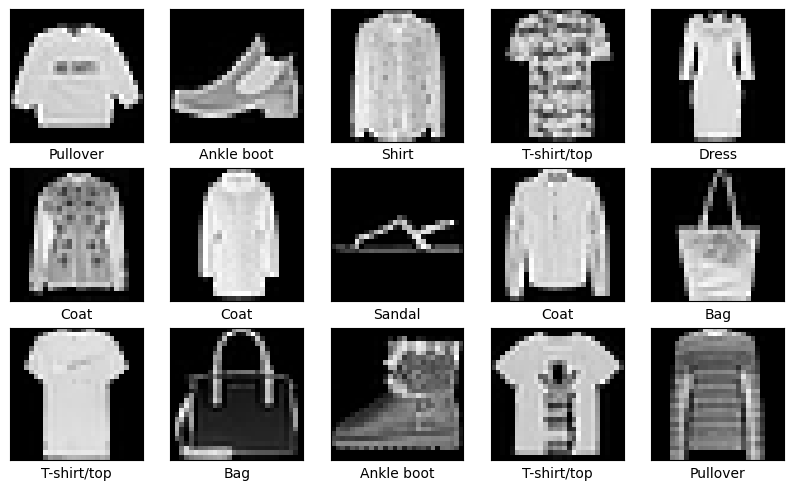

In [6]:
#Reshaping the dataset
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [7]:
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [10]:
#Creating base neural network
# 1. Define the function
from keras.layers import Input, Dense, Dropout

def create_improved_model():
    model = Sequential()
    
    # 1. Use an Input object to define the shape (fixes the UserWarning)
    # Since your data is already flattened, we use (784,)
    model.add(Input(shape=(784,)))
    
    # 2. First Hidden Layer
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    
    # 3. Second Hidden Layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    
    # 4. Output Layer
    model.add(Dense(10, activation='softmax'))
    
    # Compilation
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  metrics=['accuracy'])
    
    return model

# Re-initialize the model
model = create_improved_model()

# Now fit the model
history = model.fit(X_train_fashion, 
                    y_train_fashion, 
                    batch_size=100, 
                    epochs=30,
                    validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6690 - loss: 4.6142 - val_accuracy: 0.7321 - val_loss: 0.7394
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7283 - loss: 0.8065 - val_accuracy: 0.8078 - val_loss: 0.5469
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7728 - loss: 0.6417 - val_accuracy: 0.8325 - val_loss: 0.4844
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8021 - loss: 0.5558 - val_accuracy: 0.8412 - val_loss: 0.4419
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8168 - loss: 0.5097 - val_accuracy: 0.8456 - val_loss: 0.4239
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8246 - loss: 0.4854 - val_accuracy: 0.8544 - val_loss: 0.3959
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8352 - loss: 0.4576 - val_accuracy: 0.8584 - val_loss: 0.3915
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8411 - loss: 0.4411 - val_acc

In [11]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8895 - loss: 0.3262


In [12]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8895


In [13]:
#Predicting the labels-Fashion
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   


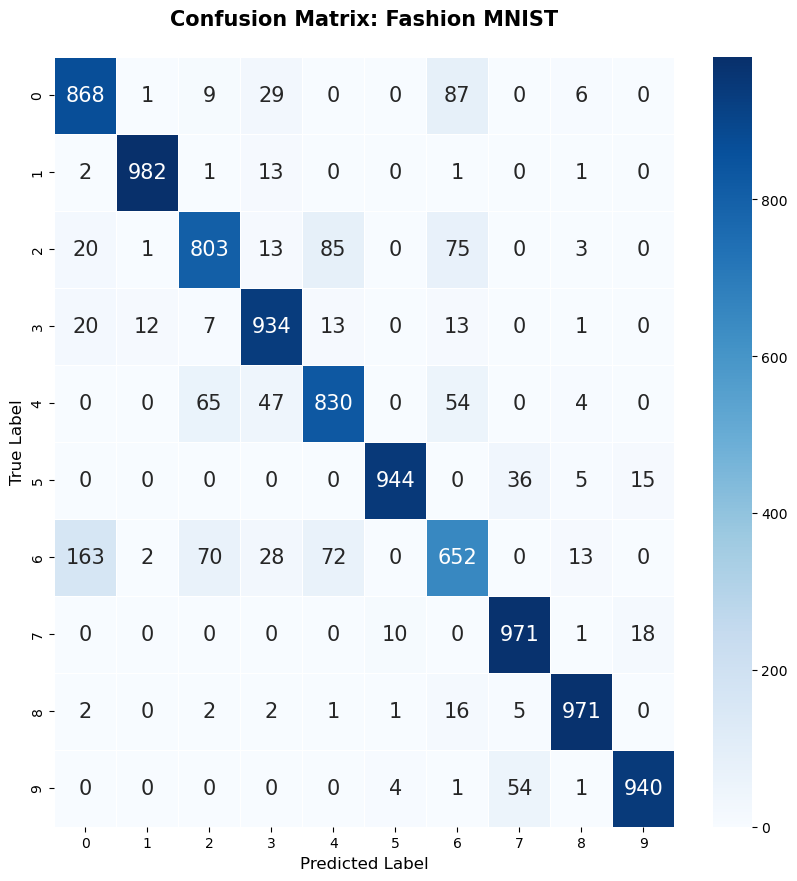

In [14]:
# con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
# plt.style.use('seaborn-deep')
# plt.figure(figsize=(10,10))
# sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
# plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
# plt.show()

# 1. Calculate the confusion matrix
con_mat = confusion_matrix(y_test_fash_eval, y_predict_fash)

# 2. Set the modern style (the v0_8 prefix is required in newer Matplotlib versions)
try:
    plt.style.use('seaborn-v0_8-deep')
except:
    plt.style.use('ggplot') # Fallback if seaborn styles aren't loaded

# 3. Plotting
plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, 
            annot=True, 
            annot_kws={'size': 15}, 
            linewidths=0.5, 
            fmt="d", 
            cmap="Blues") # Changed 'gray' to 'Blues' for better readability

# 4. Adding labels and title
plt.title('Confusion Matrix: Fashion MNIST\n', fontweight='bold', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

plt.show()

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.80      0.82      1000
           3       0.88      0.93      0.90      1000
           4       0.83      0.83      0.83      1000
           5       0.98      0.94      0.96      1000
           6       0.73      0.65      0.69      1000
           7       0.91      0.97      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [16]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


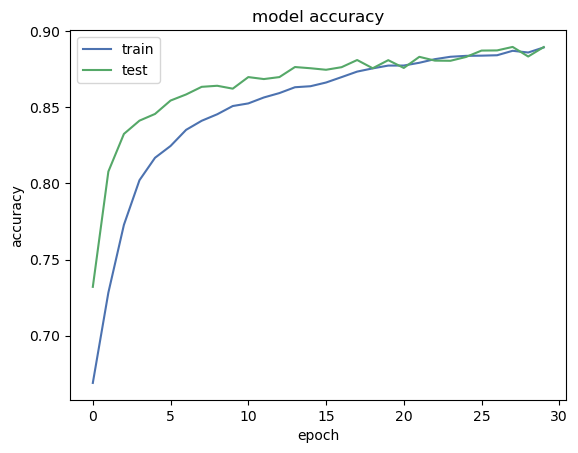

In [17]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

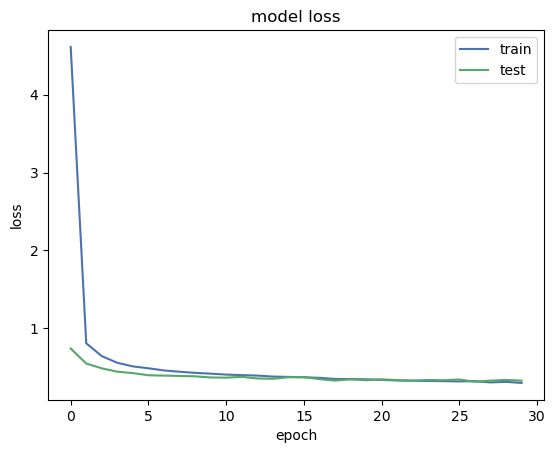

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [19]:
#tf.expand_dims(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


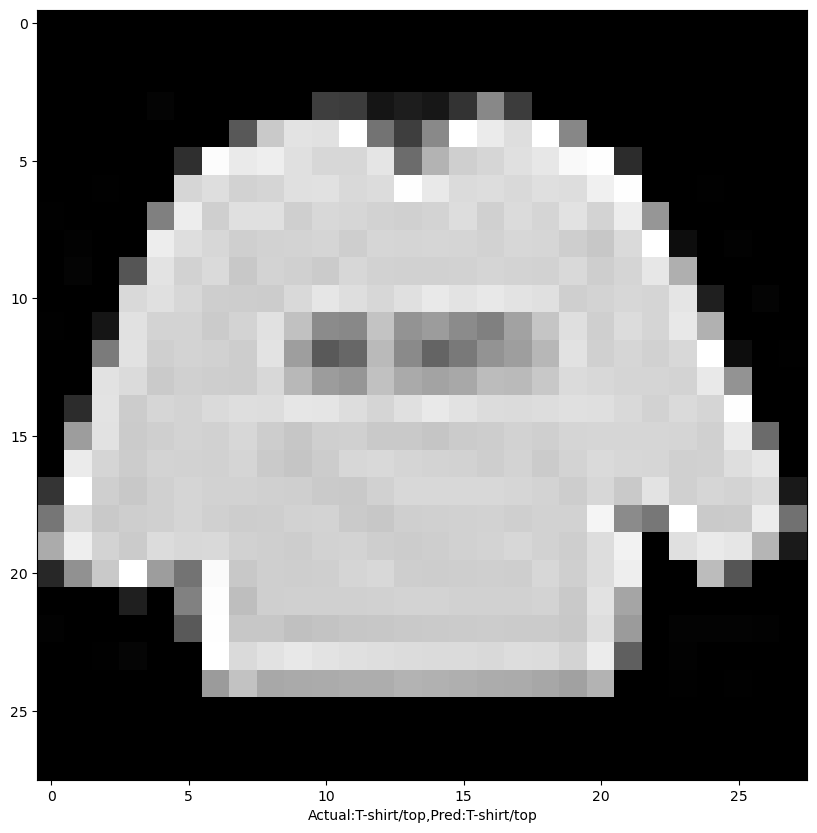

In [20]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()